# CS549-02 Machine Learning: Irfan Khan

# Assignment 4: Support vector machine (SVM) model

### Total: 18 points

In this assignment, we will build a "toy" SVM model using a mini dataset step by step.

Your goal is to run all the cells below one by one from top to bottom. Before you run some task cells, you need to complete the missing lines in them.

For each **task** cell that requires your completion, you can run the **evaluation** cell right after it to check if your answer correct.
The output of the evaluation cell should be the same as the "expected output" provided. (Some mismatch in the last digit of floating numbers is tolerable).

Non-linearly separable data points and solutions sections contributed by Vaidehi Pawar.

---
# Install dependencies

**cvxopt** is a Python package for solving optimization problems including quadratic programming problems. You can install it using the following command:
```
conda install -c conda-forge cvxopt
```

In [29]:

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from cvxopt import matrix, solvers


# Toy data
X = np.array([
    [0, 0],
    [2, 0],
    [0, 2],
    [3, 3],
    [4, 4]
])
Y = np.array([-1, -1, -1, 1, 1],dtype=np.float64)
print (X)
print (Y)

[[0 0]
 [2 0]
 [0 2]
 [3 3]
 [4 4]]
[-1. -1. -1.  1.  1.]


---

# Task
We want to build an SVM model on the toy dataset:

\begin{equation}
    x^{(1)} = (0,0),\ y^{(1)}=-1\\
    x^{(2)} = (2,0),\ y^{(2)}=-1\\
    x^{(3)} = (0,2),\ y^{(3)}=-1\\
    x^{(4)} = (3,3),\ y^{(4)}=1\\
    x^{(5)} = (4,4),\ y^{(5)}=1\\
\end{equation}

We need to solve the quadratic programming (QP) problem as the following form:

\begin{equation}
    \min_{\alpha}\big( \frac{1}{2}\lambda^{T}Q\lambda - (\textbf{1})^{T}\lambda \big) \\
    \text{subject to: } y^{T}\lambda=0,\ \lambda\geq 0
\end{equation}

The quadratic programming optimization function, solvers, in cvxopt solves the QP in this form:

\begin{equation}
    \min_{x}\big( \frac{1}{2}x^{T}Px + q^{T}x \big) \\
    \text{subject to: } Gx\leq h,\ Ax = b
\end{equation}

Therefore, in order to use solvers, we need to establish the responding relationships between variables:
$P=Q$, $x=\lambda$, $q = -(\textbf{1})^{T}$, $G = -(\textbf{1})^{T}$, $h=(\textbf{0})^{T}$, $A=y^T$, $b=(\textbf{0})^{T}$, length 1.



---
## Task 1: Compute matrix $Q$

**2 points**

First, we need to use $x^{(i)}$ and $y^{(i)}$ to compute matrix $Q$:

\begin{equation}
    Q = \begin{bmatrix}
    y^{(1)}y^{(1)}x^{(1)}.x^{(1)} & y^{(1)}y^{(2)}x^{(1)}.x^{(2)} & \dots & y^{(1)}y^{(5)}x^{(1)}.x^{(5)} \\
    y^{(2)}y^{(1)}x^{(2)}.x^{(1)} & y^{(2)}y^{(2)}x^{(2)}.x^{(2)} & \dots & y^{(2)}y^{(5)}x^{(2)}.x^{(5)} \\
    \vdots & \vdots & \ddots & \vdots \\
    y^{(5)}y^{(1)}x^{(5)}.x^{(1)} & y^{(5)}y^{(2)}x^{(5)}.x^{(2)} & \dots & y^{(5)}y^{(5)}x^{(5)}.x^{(5)} \\
    \end{bmatrix}
\end{equation}


In [30]:
### START YOUR CODE ###
n_samples = X.shape[0]
Q = np.zeros((n_samples, n_samples))

        # Hint: Use the ith and jth examples in X and Y to compute Q_ij
        # Q_ij = y^i * y^j * (x^i dotproduct x^j)

for i in range(n_samples):
    for j in range(n_samples):
        Q[i, j] = Y[i] * Y[j] * np.dot(X[i], X[j])


### END YOUR CODE ###

print('Q = ', Q)

Q =  [[ 0.  0.  0. -0. -0.]
 [ 0.  4.  0. -6. -8.]
 [ 0.  0.  4. -6. -8.]
 [-0. -6. -6. 18. 24.]
 [-0. -8. -8. 24. 32.]]


### Expected output
&nbsp;|&nbsp;
--|--
**Q =**|[[ 0.  0.  0.  0.  0.] <br>[ 0.  4.  0. -6. -8.] <br> [ 0.  0.  4. -6. -8.] <br> [ 0. -6. -6. 18. 24.] <br> [ 0. -8. -8. 24. 32.]]

---
## Task 2: Compute inputs for Quadratic Programming and Print them
**2 points**

Use the formulas: $P=Q$, $q = -(\textbf{1})^{T}$, $G = -(\textbf{1})^{T}$, $h=(\textbf{0})^{T}$, $A=y^T$, $b=(\textbf{0})^{T}$. Print P,q,G,h,b,A

In [31]:
### START YOUR CODE ###
P = Q

# Hint: Use np.ones(), q is of length 5
q = -np.ones(n_samples)

# Hint: G is a matrix whose diagnal elements are 1s, and other elements are 0s. Use np.eye()
G = -np.eye(n_samples)

# Hint: h is of length 5, with all zeros; Use np.zeros()
h = np.zeros(n_samples)

# Hint: b is of length 1, with zero value; Use np.zeros()
# Compute inputs for Quadratic Programming
b = np.zeros(1)
A = Y.reshape(1, -1)


### END YOUR CODE ###
print ('P=',P)
print('q = ', q)
print('G = ', G)
print('h = ', h)
print('b = ', b)
print ('A=',A)

P= [[ 0.  0.  0. -0. -0.]
 [ 0.  4.  0. -6. -8.]
 [ 0.  0.  4. -6. -8.]
 [-0. -6. -6. 18. 24.]
 [-0. -8. -8. 24. 32.]]
q =  [-1. -1. -1. -1. -1.]
G =  [[-1. -0. -0. -0. -0.]
 [-0. -1. -0. -0. -0.]
 [-0. -0. -1. -0. -0.]
 [-0. -0. -0. -1. -0.]
 [-0. -0. -0. -0. -1.]]
h =  [0. 0. 0. 0. 0.]
b =  [0.]
A= [[-1. -1. -1.  1.  1.]]


### Expected output
<img src="A4image1.png">

---

## Task 3: Call Quadratic Program Solver
**3 points**

Print ${\lambda}^{(i)}$, support_vector indices and support_vectors

In [32]:
### START YOUR CODE ###
cvx_P = matrix(P)
cvx_q = matrix(q)
cvx_G = matrix(G)
cvx_h = matrix(h)
cvx_A = matrix(A)
cvx_b = matrix(b)

# Hint: Call solvers.qp with the correct arguments but first convert numpy matrices
#into cvxopt matrices using  command like cvx_P = cvxopt.matrix(P)
#solution = solvers.qp(cvx_P, cvx_q, cvx_G, cvx_h, cvx_A, cvx_b)
solution = solvers.qp(cvx_P, cvx_q, cvx_G, cvx_h, cvx_A, cvx_b)

lambda_values = np.array(solution['x'])

print("Lambda values:")
print(lambda_values)

#Use a threshold of 1e-5 to deem a lambda to be non-zero.
support_vector_indices = np.where(lambda_values > 1e-5)[0]
support_vectors = X[support_vector_indices]

print("Support Vector Indices:", support_vector_indices)
print("Support Vectors:")
print(support_vectors)

### END YOUR CODE ###



     pcost       dcost       gap    pres   dres
 0: -6.1743e-01 -1.1368e+00  9e+00  3e+00  1e+00
 1: -1.2620e-01 -7.0499e-01  9e-01  1e-01  6e-02
 2: -2.1371e-01 -3.2685e-01  1e-01  6e-17  1e-15
 3: -2.4712e-01 -2.5138e-01  4e-03  1e-16  3e-16
 4: -2.4997e-01 -2.5001e-01  4e-05  3e-17  4e-16
 5: -2.5000e-01 -2.5000e-01  4e-07  6e-17  5e-16
 6: -2.5000e-01 -2.5000e-01  4e-09  9e-17  4e-16
Optimal solution found.
Lambda values:
[[2.59450615e-09]
 [1.24999998e-01]
 [1.24999998e-01]
 [2.49999999e-01]
 [2.90286660e-10]]
Support Vector Indices: [1 2 3]
Support Vectors:
[[2 0]
 [0 2]
 [3 3]]


### Expected output

<img src="A4image2.png">

## Task 4: Solve the decision boundary
**1 points**

Use the support vectors to obtain $\bf w$ and $b$ for the decision boundary ${\bf w}{\bf x}^T+b=0$.
${\bf w}=\sum_{{\bf x}^{(i)}\in SV}{\lambda}^{(i)}y^{(i)}{\bf x}^{(i)}$

$b$ can be obtained using one of the support vectors ${\bf x}^{(k)}$ in $y^{k}(b+\sum_{j=1}^{n}w_{j}{x_{j}}^{(k)})$


In [33]:
###START YOUR CODE

support_vector_labels = Y[support_vector_indices]
support_lambdas = lambda_values[support_vector_indices]


w = np.sum(support_lambdas * support_vector_labels[:, None] * support_vectors, axis=0)

b = support_vector_labels[0] - np.dot(w, support_vectors[0])


#end your code

print (w)
print (b)




[0.5 0.5]
-2.0000000004443756


## Expected Output

[0.5 0.5]<br>
-2.0000...


# Task 5: Use sklearn.svm to obtain Support Vectors Directly
**2 points**

Use sklearn.svm and print the support vectors and plot the SVM decision boundary

In [34]:
#Dont change the code in this cell
def plot_decision_boundary(X, classifier, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

Support Vectors using SVM:
[[2 0]
 [0 2]
 [3 3]]


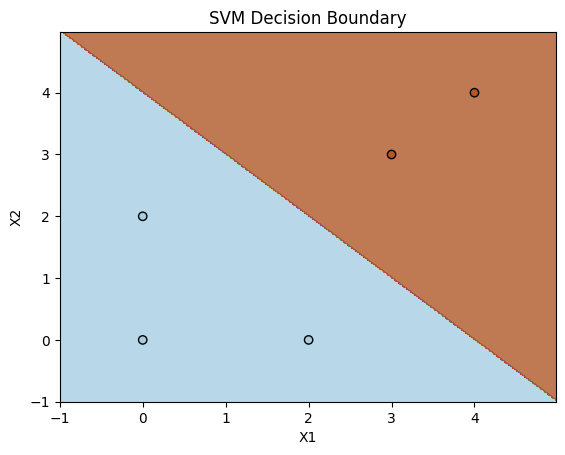

In [35]:
# Import necessary libraries

from sklearn.svm import SVC

#Begin Code

# Initialize the SVM model, "svm_model", linear Kernel, Use default value for C=1
svm_model = SVC(kernel='linear', C=1)

# Train the SVM model (svm_model) with X and Y and obtain the support vectors using svm_model.support_vectors_
svm_model.fit(X, Y)


#End Code
print("Support Vectors using SVM:")
print (support_vectors)

plot_decision_boundary(X, svm_model, 'SVM Decision Boundary')

# Expected Result
[[2. 0.]<br>
 [0. 2.]<br>
 [3. 3.]]
<img src="A4image3.png">

# Task 6: Compare Logistic Regression with SVM
**6 points**

For this task we will also utilize the Scikit-Learn modules for Logistic Regression. In this task, we will explore what the classification boundary looks like for logistic regression for the above data set X. Then we create a new data set Xnew with 3 new data points and again compare what the classification boundary looks like for Logistic Regression and for SVM

# Task 6a
**2 points**

For the data set X, perform logistic regression and come up with the classification boundary. Look up documentation on Logistic Regression support in sklearn.linear_model.


Weights: [0.73551682 0.73551682]
Bias: -3.2901829536836273


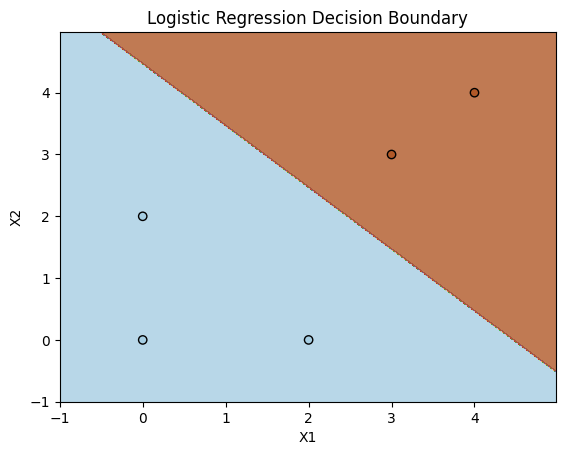

In [36]:
#Start your code

#Use LogisticRegression module from sklearn
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

# Train the logistic regression model
logistic_regression.fit(X, Y)

# Get the weights (aka coefficients)
weights = logistic_regression.coef_[0]

# Get the bias (aka intercept)
bias = logistic_regression.intercept_[0]

#End your code

print("Weights:", weights)
print("Bias:", bias)
plot_decision_boundary(X, my_logistic_regression, 'Logistic Regression Decision Boundary')

# Expected Output

<img src="A4image4.png">

Compare the weight and bias parameters with weight and bias parameters for the decision boundary obtained using SVM!


# Toy data after adding three new datapoints

In [37]:
# Toy data after adding three new datapoints. Don't change this code cell
Xnew = np.array([
    [0, 0],
    [2, 0],
    [0, 2],
    [3, 3],
    [4, 4],
    [4, 5],
    [5, 4],
    [5, 5]
])
Ynew = np.array([-1, -1, -1, 1, 1, 1, 1, 1],dtype=np.float64)
Ynew_LR = np.array([0, 0, 0, 1, 1, 1, 1, 1],dtype=np.float64)

# Task 6b Obtain SVM Classification Boundary Parameters for the updated dataset
**1 point**



In [38]:
#Start your Code

# Initialize the SVM model, "svm_model", linear Kernel, Use default value for C=1
svm_model_new = SVC(kernel='linear', C=1)

# Train the SVM model (svm_model) with X and Y and obtain the support vectors using svm_model.support_vectors_
svm_model_new.fit(Xnew, Ynew)

#Print Support Vectors, weights and bias
support_vectors = svm_model_new.support_vectors_
weights = svm_model_new.coef_
bias = svm_model_new.intercept_

print ('support vectors', support_vectors)
print ('weights', weights)

# Get the bias (intercept)


print ('bias', bias)

#End your Code

support vectors [[2. 0.]
 [0. 2.]
 [3. 3.]]
weights [[0.49984 0.49984]]
bias [-1.99946667]


# Expected Results

support vectors [[2. 0.]
 [0. 2.]
 [3. 3.]]<br>
weights [[0.49984 0.49984]]<br>
bias [-1.99946667]<br>

You can see that the decision boundary remains unchanged even though we added 3 new data points because the support vectors are unchanged!

# Task 6c Obtain Logistic Regression Classification Boundary Parameters for the updated dataset
**1 point**


In [39]:
#Start your Code
logistic_regression_new = LogisticRegression()
logistic_regression_new.fit(Xnew, Ynew)

# Get the weights (coefficients)
weights = logistic_regression_new.coef_

# Get the bias (intercept)
bias = logistic_regression_new.intercept_
# Get the bias (intercept)

print("Weights:", weights)
print("Bias:", bias)

#End your code

Weights: [[0.79464932 0.79464932]]
Bias: [-3.40903793]


# Expected Results

Weights: [[0.79458759 0.79458759]]<br>
Bias: [-3.40847681]<br>

You can see that the decision boundary has shifted with the addition of the 3 new data points!

#  7. How to Handle Non-Linearly Separable Data?

Support Vector Machines (SVMs) are powerful classification models used in machine learning. However, when dealing with non-linearly separable training data, a linear hard-margin SVM fails to create an effective decision boundary. In this section, we will practice using kernel methods and soft margin SVM.


## **Import Libraries**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

## **Generate and Visualize the Dataset**
We'll generate a dataset using make_circles(), which creates two concentric circles that are not linearly separable.



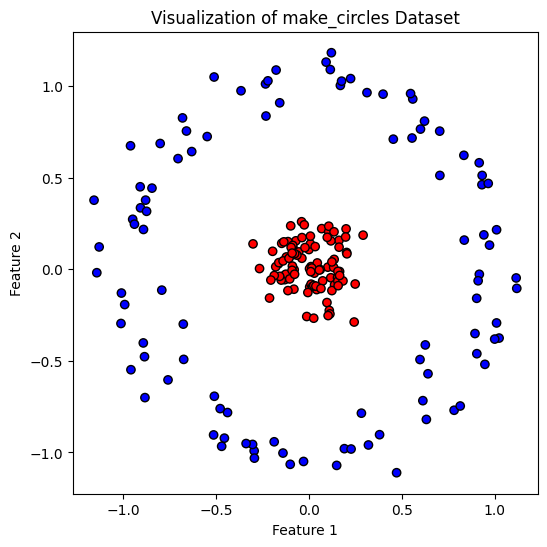

In [41]:
# Generate non-linearly separable circular dataset
X, y = make_circles(n_samples=200, factor=0.1, noise=0.1, random_state=42)

# Scatter plot using Matplotlib
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("Visualization of make_circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



# Expected Result
<img src="A4image5.png"><br>


**Observation:** Notice that the two classes are arranged in circles, making it impossible for a linear classifier to separate them.



# Task 7a: Train SVM with two different C Values (Linear SVM), C=1 and C=10
**2 points**

In [42]:
# Split into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define two different C values, 1 and 10, for SVM (Linear) - No Kernel Trick. use sklearn.svm
#Start your code##
svm_models = {
    1: SVC(kernel="linear", C=1),
    10: SVC(kernel="linear", C=10)
}

# Train each SVM model with different C values

for C, model in svm_models.items():
    model.fit(X_train, y_train)



#End your code

We'll now plot the decision boundaries for the linear SVM models with different C values.  Leave the below code unchanged.


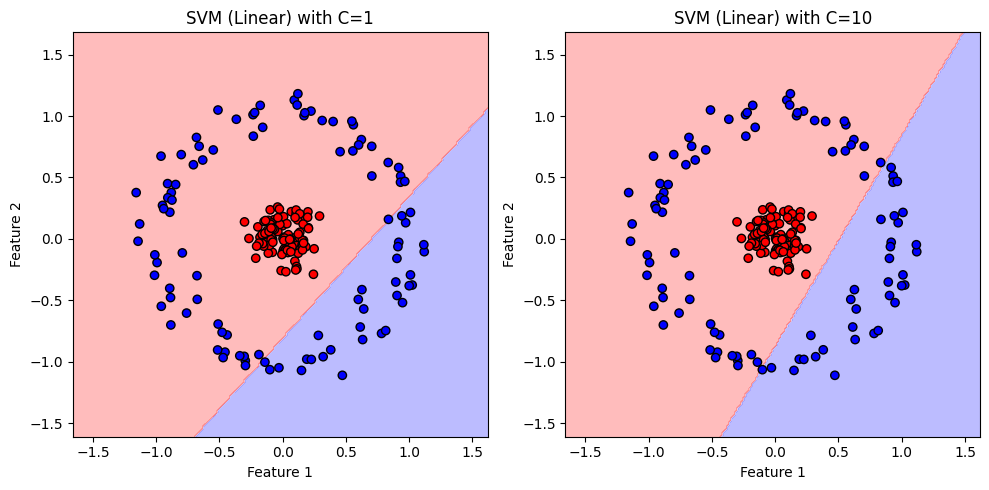

In [43]:
# Function to plot decision boundaries
def plot_decision_boundary(ax, model, X, y, title):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 200),
                         np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

# Create a figure with equal-sized subplots
fig, axes = plt.subplots(1, len(svm_models), figsize=(10, 5))  # Adjust width as needed

# Plot decision boundaries for different C values (Linear SVM)
for ax, (C, model) in zip(axes, svm_models.items()):
    plot_decision_boundary(ax, model, X, y, f"SVM (Linear) with C={C}")

plt.tight_layout()
plt.show()


# Expected Result

<img src="A4image6.png"><br>
**Observation:**


*   Even as C increases, the linear SVM fails to correctly separate the data.
*   A higher C makes the decision boundary better, but the problem remains since the data is non-linearly separable.




# **Task 7b: Applying the Kernel Trick (RBF Kernel)**
**2 Points**

To fix this issue, we transform the data into a higher dimension using the Radial Basis Function (RBF) Kernel



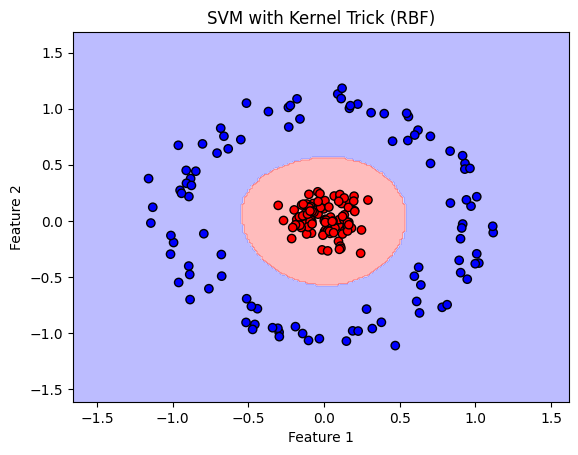

In [44]:
#Start your Code#
# SVM with Kernel Trick (RBF). Use sklearn.svm
svm_kernel = SVC(kernel='rbf', C=1, gamma='scale')
svm_kernel.fit(X_train, y_train)

# End your code

# Plot decision boundary for SVM with Kernel Trick (RBF)
fig, axes = plt.subplots()
plot_decision_boundary(axes, svm_kernel, X, y, "SVM with Kernel Trick (RBF)")
plt.show()

# Expected Result

<img src="A4image8.png"><br>
